# **Análise do Dataset**

In [14]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [15]:
features = ["Pregnancies", "Glucose", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
label = "Outcome"
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
 print("Paciente", str(n+1), "\n Features:", list(X[n]), "\n Label:", y[n])

Paciente 1 
 Features: [6.0, 148.0, 35.0, 0.0, 33.6, 0.627, 50.0] 
 Label: 1
Paciente 2 
 Features: [1.0, 85.0, 29.0, 0.0, 26.6, 0.35100000000000003, 31.0] 
 Label: 0
Paciente 3 
 Features: [8.0, 183.0, 0.0, 0.0, 23.3, 0.672, 32.0] 
 Label: 1
Paciente 4 
 Features: [1.0, 89.0, 23.0, 94.0, 28.1, 0.16699999999999998, 21.0] 
 Label: 0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

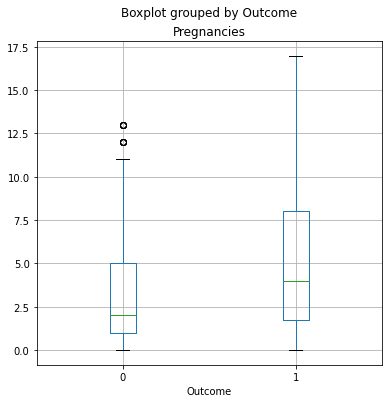

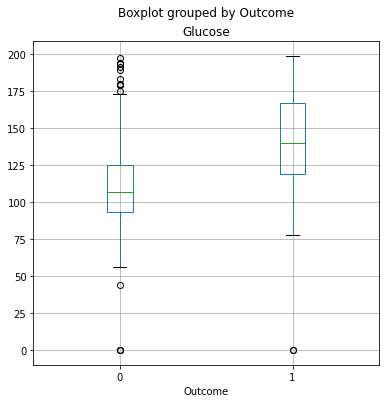

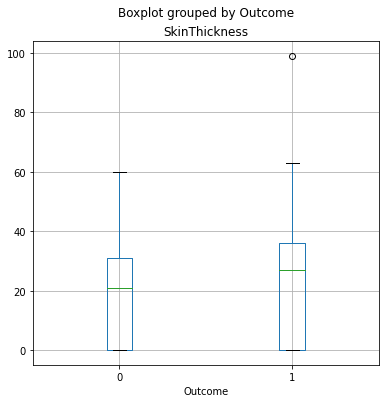

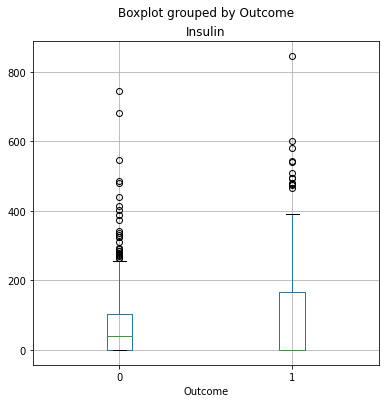

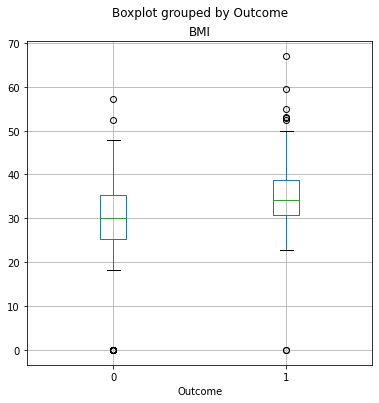

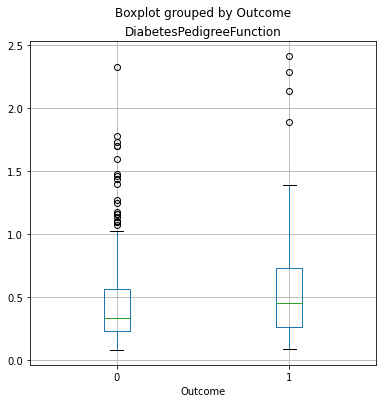

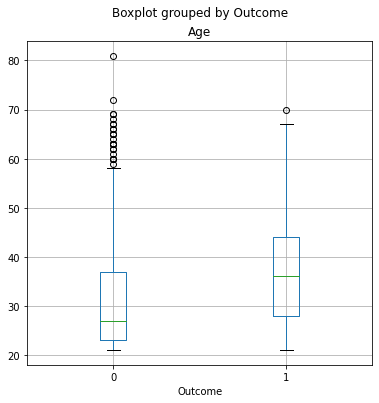

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ["Pregnancies", "Glucose", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
for col in features:
  diabetes.boxplot(column=col, by="Outcome", figsize=(6,6))
  plt.title(col)
plt.show()

# **Treinamento e Teste**

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print("Training cases: %d\nTest cases: %d" % (X_train.shape[0], X_test.shape[0]))

Training cases: 537
Test cases: 231


In [22]:
from sklearn.linear_model import LogisticRegression

reg = 0.1

model = LogisticRegression(C = 1/reg, solver="liblinear").fit(X_train, y_train)
print(model)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [23]:
predictions = model.predict(X_test)
print("Rótulos Previstos: ", predictions)
print("Rótulos Atuais: ", y_test)

Rótulos Previstos:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0]
Rótulos Atuais:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0]


In [24]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, predictions))

Accuracy:  0.7748917748917749


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.85       157
           1       0.71      0.50      0.59        74

    accuracy                           0.77       231
   macro avg       0.75      0.70      0.72       231
weighted avg       0.77      0.77      0.76       231



In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[142  15]
 [ 37  37]]


In [29]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.05298856 0.94701144]
 [0.8205625  0.1794375 ]
 [0.90588735 0.09411265]
 [0.36894594 0.63105406]
 [0.87025929 0.12974071]
 [0.95311142 0.04688858]
 [0.26816697 0.73183303]
 [0.1494916  0.8505084 ]
 [0.65771629 0.34228371]
 [0.63662828 0.36337172]
 [0.42398474 0.57601526]
 [0.05066637 0.94933363]
 [0.69769927 0.30230073]
 [0.8570232  0.1429768 ]
 [0.87163818 0.12836182]
 [0.83535903 0.16464097]
 [0.15925748 0.84074252]
 [0.97356537 0.02643463]
 [0.53446826 0.46553174]
 [0.78401903 0.21598097]
 [0.33627872 0.66372128]
 [0.56400038 0.43599962]
 [0.89432356 0.10567644]
 [0.91940515 0.08059485]
 [0.9411154  0.0588846 ]
 [0.67608464 0.32391536]
 [0.93913303 0.06086697]
 [0.09864407 0.90135593]
 [0.88021813 0.11978187]
 [0.84516859 0.15483141]
 [0.53371895 0.46628105]
 [0.76914892 0.23085108]
 [0.87413835 0.12586165]
 [0.61763114 0.38236886]
 [0.90150563 0.09849437]
 [0.31490802 0.68509198]
 [0.50980522 0.49019478]
 [0.87592893 0.12407107]
 [0.73818744 0.26181256]
 [0.2893332  0.7106668 ]


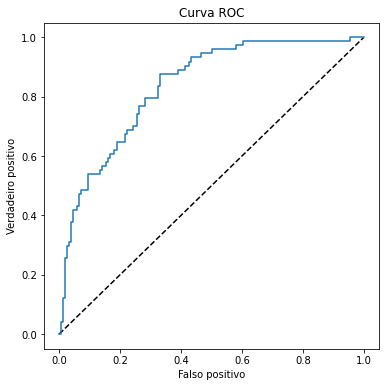

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("Falso positivo")
plt.ylabel("Verdadeiro positivo")
plt.title("Curva ROC")
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_scores[:,1])
print("AUC: " + str(auc))

AUC: 0.8349113444654845
